<a href="https://colab.research.google.com/github/pedro092692/fatal_force/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
def df_info(df: list):
  for data in df:
    print('Dataframe shape:', data.shape)
    print('Dataframe Columns:',data.columns)
    print('Dataframe NaN values:',data.isna().sum())
    print('Dataframe Duplicates:',data.duplicated().sum())
    print('\n')

df_info([df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities])

Dataframe shape: (29322, 3)
Dataframe Columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Dataframe NaN values: Geographic Area     0
City                0
Median Income      51
dtype: int64
Dataframe Duplicates: 0


Dataframe shape: (29329, 3)
Dataframe Columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Dataframe NaN values: Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Dataframe Duplicates: 0


Dataframe shape: (29329, 3)
Dataframe Columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Dataframe NaN values: Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Dataframe Duplicates: 0


Dataframe shape: (29268, 7)
Dataframe Columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Dataframe NaN values: Geographic area          0
City       

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
#fill with 0 missing data
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
# convert income into float
df_hh_income.rename(columns={'Median Income': 'Median_Income'}, inplace=True)
df_hh_income.Median_Income = df_hh_income.Median_Income.str.replace('(X)', '0').str.replace('-', '0').str.replace(',', '').str.replace('+', '').astype(float)
df_hh_income = df_hh_income.loc[df_hh_income.Median_Income != 0]


In [ ]:
df_hh_income.sort_values(by='Median_Income', ascending=True).dropna()
income_by_state = df_hh_income.groupby('Geographic Area').agg(
    {'Median_Income': 'mean'}
).sort_values(by='Median_Income', ascending=True)
media_income_bar = px.bar(
    income_by_state,
    x=income_by_state.index,
    y='Median_Income',
    color=income_by_state.index,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Median Household Income by State'
)
media_income_bar.update_layout(
    xaxis_title='State',
    yaxis_title='Median Income'
    )
media_income_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
# convert ptc into int64
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace('-', '0').astype(float)
df_pct_completed_hs.loc[df_pct_completed_hs.percent_completed_hs == 0, 'percent_completed_hs'] = np.nan
df_pct_completed_hs.dropna(inplace=True)
hs_graduation_rate = df_pct_completed_hs.groupby('Geographic Area').agg(
    {'percent_completed_hs': 'mean'}
).sort_values(by='percent_completed_hs', ascending=True)

hs_graduation_rate

# chart


,percent_completed_hs
Geographic Area,
TX,76.77
MS,78.47
GA,79.01
LA,79.29
AR,79.95
AL,80.30
AZ,80.83
SC,81.06
TN,81.63


In [ ]:
hs_graduation_rate_bar = px.bar(
    hs_graduation_rate,
    x=hs_graduation_rate.index,
    y='percent_completed_hs',
    color=hs_graduation_rate.index,
    title='High School Graduation Rate by State'
)
hs_graduation_rate_bar.update_layout(
    xaxis_title='State',
    yaxis_title='High School Graduation Rate'
)
hs_graduation_rate_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

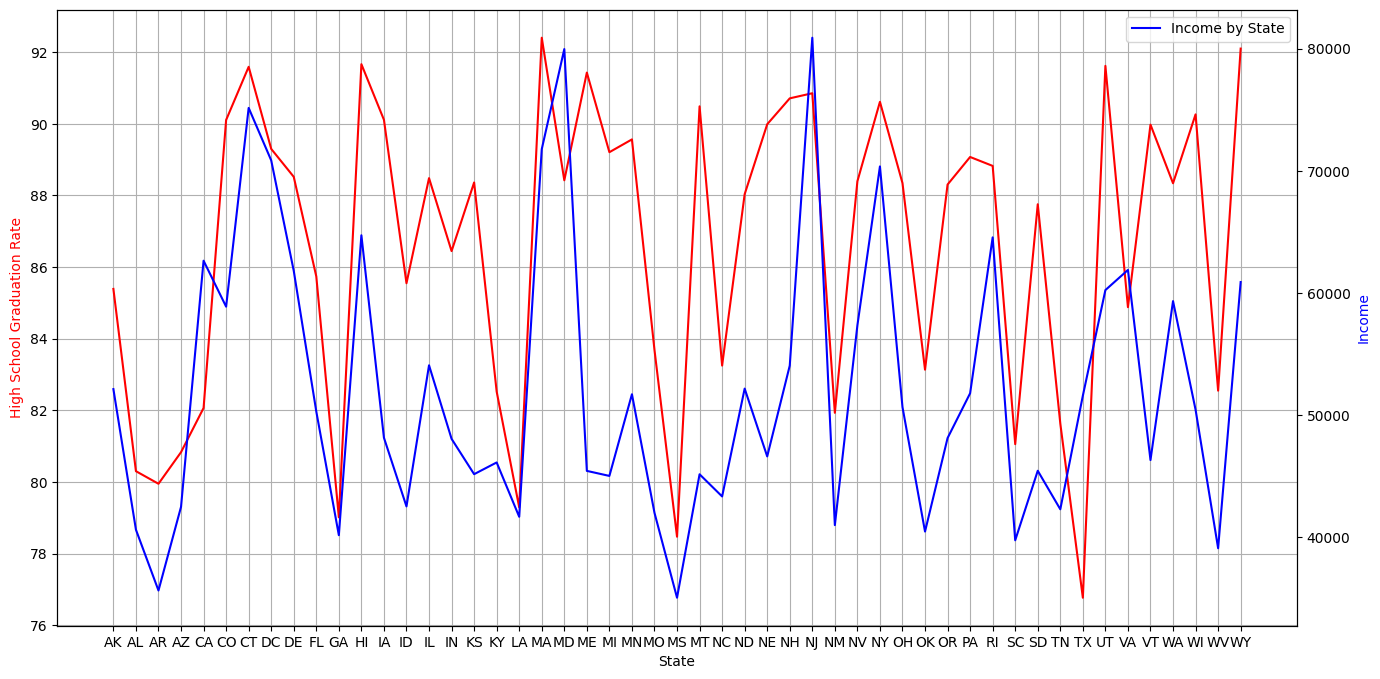

In [ ]:
plt.figure(figsize=(16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax2.plot(income_by_state.sort_index(), label='Income by State', color='blue')
ax1.plot(hs_graduation_rate.sort_index(), label='High School Graduation Rate', color='red')

ax1.grid(visible=True)

ax1.set_xlabel('State')
ax1.set_ylabel('High School Graduation Rate', color='red')
ax2.set_ylabel('Income', color='blue')

plt.legend()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

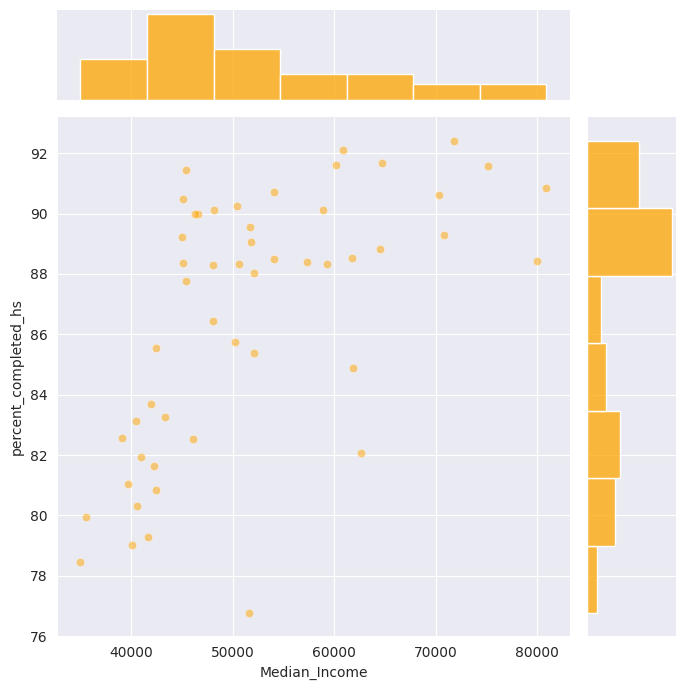

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=income_by_state['Median_Income'],
                y=hs_graduation_rate['percent_completed_hs'],
                height=7,
                color='orange',
                joint_kws={'alpha':0.5})
  plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

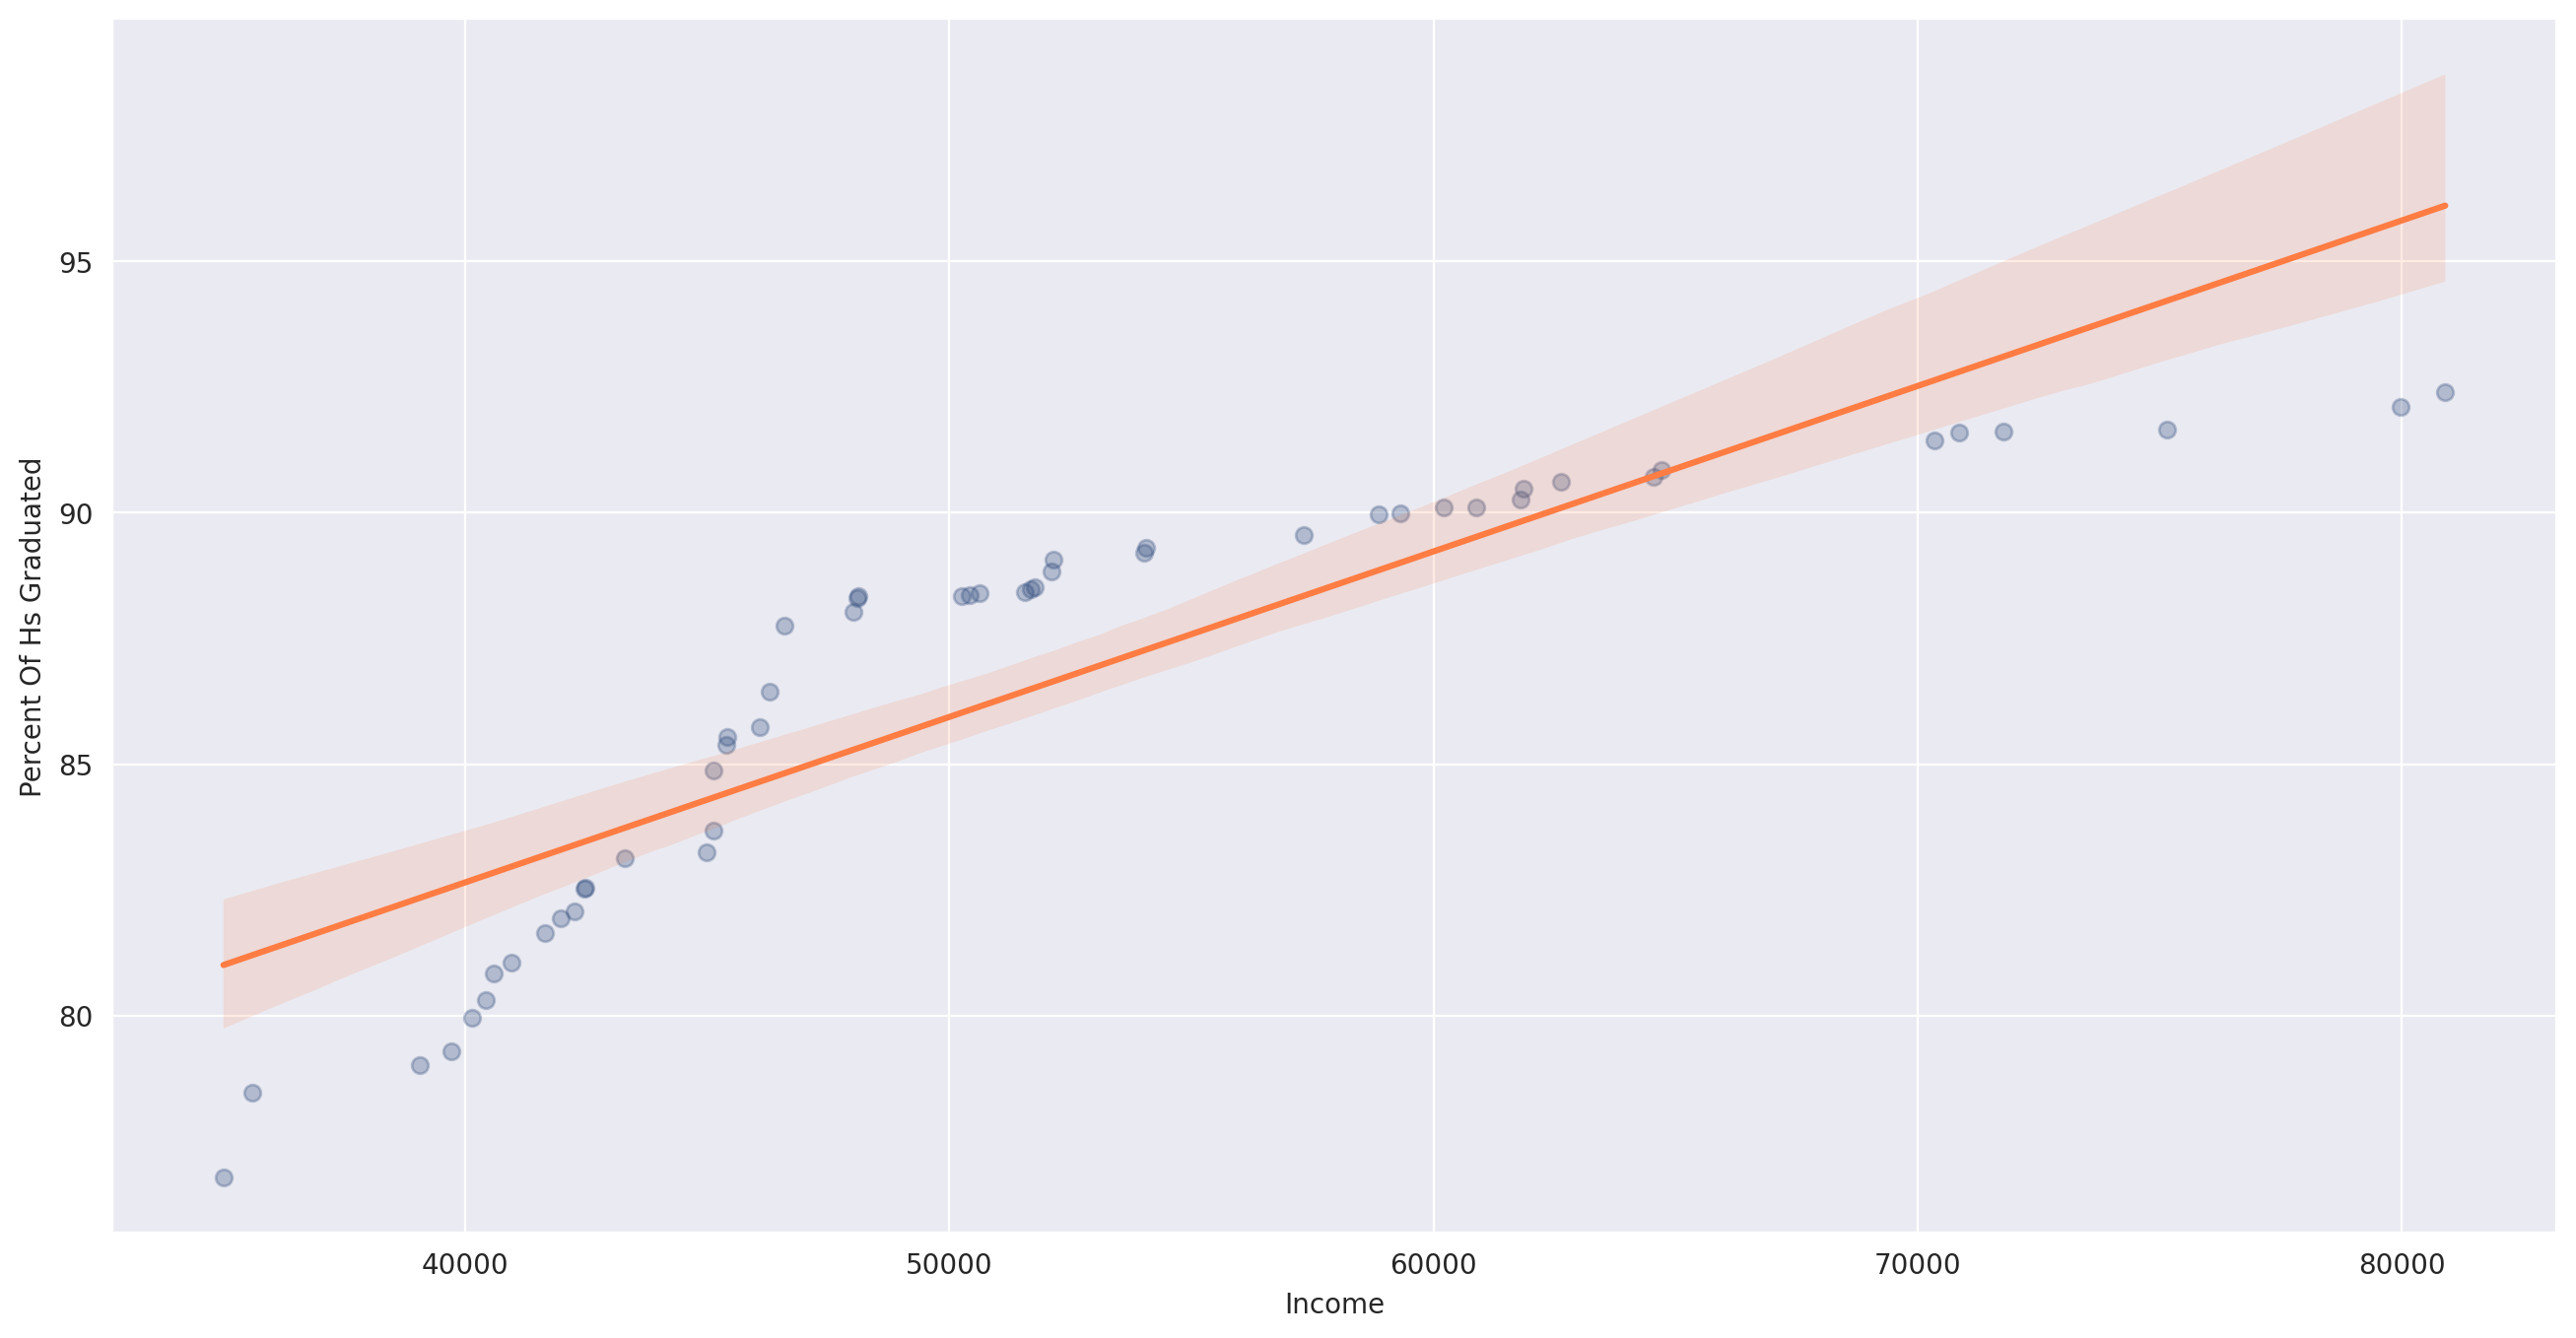

In [ ]:
plt.figure(figsize=(16, 8), dpi=200)

with sns.axes_style('darkgrid'):
  ax1 = sns.regplot(
      x=income_by_state.Median_Income,
      y=hs_graduation_rate.percent_completed_hs,
      color='#2f4b7c',
      scatter_kws = {'alpha': 0.3},
      line_kws = {'color': '#ff7c43'}
  )
  ax1.set(
      ylabel='Percent Of Hs Graduated',
      xlabel='Income'
  )

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
#convert string into int64
df_share_race_city.share_white = df_share_race_city.share_white.str.replace('-', '0').str.replace('(X)', '0').astype(float)
df_share_race_city.share_black = df_share_race_city.share_black.str.replace('-', '0').str.replace('(X)', '0').astype(float)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.str.replace('-', '0').str.replace('(X)', '0').astype(float)
df_share_race_city.share_asian = df_share_race_city.share_asian.str.replace('-', '0').str.replace('(X)', '0').astype(float)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.str.replace('-', '0').str.replace('(X)', '0').astype(float)

In [ ]:
race_by_state = df_share_race_city.groupby('Geographic area').agg(
    {
        'share_white': 'mean',
        'share_black': 'mean',
        'share_hispanic': 'mean',
        'share_asian': 'mean',
        'share_native_american': 'mean'
    }
)
race_by_state

,share_white,share_black,share_hispanic,share_asian,share_native_american
Geographic area,,,,,
AK,45.26,0.56,2.13,1.38,45.48
AL,72.51,23.32,2.98,0.48,0.66
AR,78.45,16.30,4.27,0.48,0.76
AZ,59.93,0.95,20.14,0.73,28.59
CA,71.54,2.68,29.51,5.54,1.72
CO,87.77,0.92,17.90,1.15,1.62
CT,86.11,4.99,7.98,2.99,0.66
DC,38.50,50.70,9.10,3.50,0.30
DE,76.25,15.39,7.42,2.00,0.52


In [ ]:
race_by_state_bar = px.bar(
    race_by_state,
    x=race_by_state.index,
    y=race_by_state.columns,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Racial Makeup of Each US State'
)

race_by_state_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
people_killed_by_race = df_fatalities.race.value_counts()
people_killed_by_race_donut = px.pie(
    values=people_killed_by_race,
    names=people_killed_by_race.index,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='People Killed by Race'
)
people_killed_by_race_donut.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
number_of_deaths_by_gender = df_fatalities.gender.value_counts()
number_of_deaths_by_gender_donut = px.pie(
    values=number_of_deaths_by_gender,
    names=number_of_deaths_by_gender.index,
    color=number_of_deaths_by_gender.index,
    title='Total Number of Deaths of Men and Women'
)
number_of_deaths_by_gender_donut.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
age_and_manner_of_death_box = px.box(
    df_fatalities,
    x='gender',
    y='age',
    color='manner_of_death',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Age and Manner of Death'
)
age_and_manner_of_death_box.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
type_of_weapon_armed = df_fatalities.armed.value_counts()
type_of_weapon_armed.sort_values(ascending=False, inplace=True)
type_of_weapon_armed_bar = px.bar(
    type_of_weapon_armed,
    x=type_of_weapon_armed.index,
    y=type_of_weapon_armed.values,
    color=type_of_weapon_armed.index,
    title='Type of Weapon Armed'
)
type_of_weapon_armed_bar.update_layout(
    xaxis_title='Type of Weapon',
    yaxis_title='Number of People Killed'
)
type_of_weapon_armed_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
percent_killed_people = df_fatalities.age.value_counts().sort_index()
percent_killed_people_bar = px.bar(
    percent_killed_people,
    x=percent_killed_people.index,
    y=percent_killed_people.values,
    color=percent_killed_people.index,
    title='How Old Were the People Killed'
)

percent_killed_people_bar.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of People Killed'
)
percent_killed_people_bar.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:

# Calculate the percentage of people killed under 25
total_killed = len(df_fatalities)
killed_under_25 = len(df_fatalities[df_fatalities['age'] < 25])
percentage_under_25 = (killed_under_25 / total_killed) * 100

print(f"{percentage_under_25:.2f}% of people killed were under 25 years old.")


20.79% of people killed were under 25 years old.


Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
people_killed_by_race = df_fatalities.race.value_counts()
people_killed_by_race_chart = px.bar(
    people_killed_by_race,
    x=people_killed_by_race.index,
    y=people_killed_by_race.values,
    color=people_killed_by_race.index,
    title='People Killed by Race'
)
people_killed_by_race_chart.update_layout(
    xaxis_title='Race',
    yaxis_title='Number of People Killed'
)
people_killed_by_race_chart.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
percent_mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
total_killed = len(df_fatalities)
killed_with_mental_illness = len(df_fatalities[df_fatalities['signs_of_mental_illness'] == True])
percentage_with_mental_illness = (killed_with_mental_illness / total_killed) * 100

print(f"{percentage_with_mental_illness:.2f}% of people killed by police have been diagnosed with a mental illness.")

24.97% of people killed by police have been diagnosed with a mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_cities = df_fatalities.city.value_counts().head(10)
top_cities_bar = px.bar(
    top_cities,
    x=top_cities.index,
    y=top_cities.values,
    color=top_cities.index,
    title='Top 10 Cities with the Most Police Killings'
)
top_cities_bar.update_layout(
    xaxis_title='City',
    yaxis_title='Number of Police Killings'
)
top_cities_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
rate_death_by_race = df_fatalities.groupby(['city', 'race']).size().reset_index(name='count')
rate_death_by_race_top_10 = rate_death_by_race[rate_death_by_race['city'].isin(top_cities.index)]
rate_death_by_race_top_10_bar = px.bar(
    rate_death_by_race_top_10,
    x='city',
    y='count',
    color='race',
    title='Rate of Death by Race'
)
rate_death_by_race_top_10_bar.update_layout(
    xaxis_title='City',
    yaxis_title='Number of Police Killings'
)
rate_death_by_race_top_10_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
most_dangerous_states = df_fatalities.state.value_counts().head(10)
most_dangerous_states
map_choropleth = px.choropleth(
    locations=most_dangerous_states.index,
    locationmode='USA-states',
    color=most_dangerous_states.values,
    scope='usa',
    color_continuous_scale='Reds',
    title='Most Dangerous States'
)
map_choropleth.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
killing_over_time = df_fatalities.groupby(df_fatalities.date.dt.year).agg({
    'manner_of_death':'count'
})
killing_over_time_line = px.line(
    killing_over_time,
    x=killing_over_time.index,
    y=killing_over_time.manner_of_death,
    title='Number of Police Killings Over Time'
)
killing_over_time_line.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Police Killings'
)
killing_over_time_line.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).